# Score-Convolutional Activated Mapping Sample

This is an implementation of:
<cite data-cite="wang2019scorecamimproved">Score-CAM Improved Visual Explanations Via Score-Weighted Class Activation Mapping</cite>.
(H. Wang et al.)

## VGG 16 Demo, heatmaps for cat vs dog region in the image

### Initialize preferred CNN network 

In [1]:
from keras.applications import VGG16
import numpy as np
model = VGG16(weights='imagenet')
input_shape = (224, 224)
conv_layers = model.layers[-6].output
softmax_output = model.layers[-1].output

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
from keras_applications.vgg16 import preprocess_input
from keras_preprocessing.image import load_img, img_to_array
import keras

source_img = load_img('./images/cat_dog_2.jpg', target_size=input_shape)
img = img_to_array(source_img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img, backend=keras.backend)

### Initialize ScoreCAM for Keras framework

Please, wait, this will require inference of additional filters_count images. 

In [3]:
from scam.keras_scam import ScoreCAM
scoreCAM = ScoreCAM(model_input=model.input, last_conv_output=conv_layers, softmax_output=softmax_output, input_shape=input_shape)
scoreCAM.prepare_cam(img)

### Visualize Score-CAM

In [4]:
import matplotlib.pyplot as plt


def draw_original_and_heatmap(class_id):
    heatmap = scoreCAM.get_class_heatmap(class_id)
    f = plt.figure(figsize=(8,8))
    left = f.add_subplot(131)
    left.set_title("Original image")
    left.axis('off')
    left.imshow(source_img)
    
    right = f.add_subplot(132)    
    right.set_title("Heatmap for class {}".format(class_id))
    right.axis('off')
    right.imshow(heatmap, cmap='plasma')
    
    merged = f.add_subplot(133)    
    merged.set_title("Overlay for class {}".format(class_id))
    merged.axis('off')
    merged.imshow(source_img, alpha=0.5)
    merged.imshow(heatmap, cmap='plasma', alpha=0.5)

#### Dog

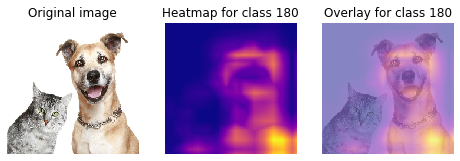

In [5]:
# 'n02093428', 'American_Staffordshire_terrier' 
dog_class_id = 180
draw_original_and_heatmap(dog_class_id)

#### Cat

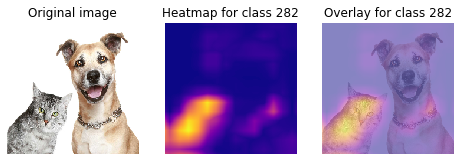

In [6]:
# 'n02123159', 'tiger_cat'
cat_class_id = 282
draw_original_and_heatmap(cat_class_id)

#### Some random class, e.g. 'carousel'

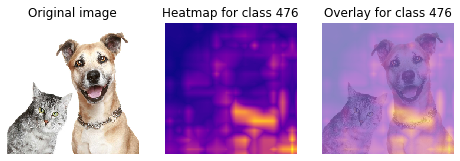

In [7]:
# 'n02782093', 'balloon'
carousel_id = 476
draw_original_and_heatmap(carousel_id)